## Cationic (Crystal violet) Dyes Removal

In [1]:
# Import basic libraries
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# import datawig
# import missingno as msno

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

%matplotlib inline

print('Imports complete!')

C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Imports complete!


In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy #for what? It's a library that let us copy things
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

### Data import and exploratory

In [2]:
data = pd.read_csv('msn_cv_adsorption.csv', index_col=None)

data.tail()
data.shape

(105, 6)

In [77]:
df = pd.read_csv('msn_cv_adsorption.csv', index_col=None)

df.head()


,Time,Functional group,Dose,Initial_conc,pH,Removal_eff
0,60,MSN,0.5,20,3.15,16.173511
1,60,MSN,0.5,20,4.95,39.461475
2,60,MSN,0.5,20,7.56,68.610607
3,60,MSN,0.5,20,9.30,94.011600
4,60,MSN,0.5,20,10.80,13.991432


In [388]:
#To convert categorical data using OneHot Encoder
df_encoded = pd.get_dummies(df, columns=['Functional group'])

# Display the transformed DataFrame
# print(df_encoded)

In [ ]:
# Using sklearn preprocessing for LabelEncoder
df2 = df

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Apply label encoding to categorical columns
df2['Functional group'] = le.fit_transform(df2['Functional group'])

df2.head()

In [ ]:
# Calculate the correlation matrix for numerical columns
# correlation_matrix = df_encoded.corr()
correlation_matrix = df2.corr()

# Display the correlation matrix
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

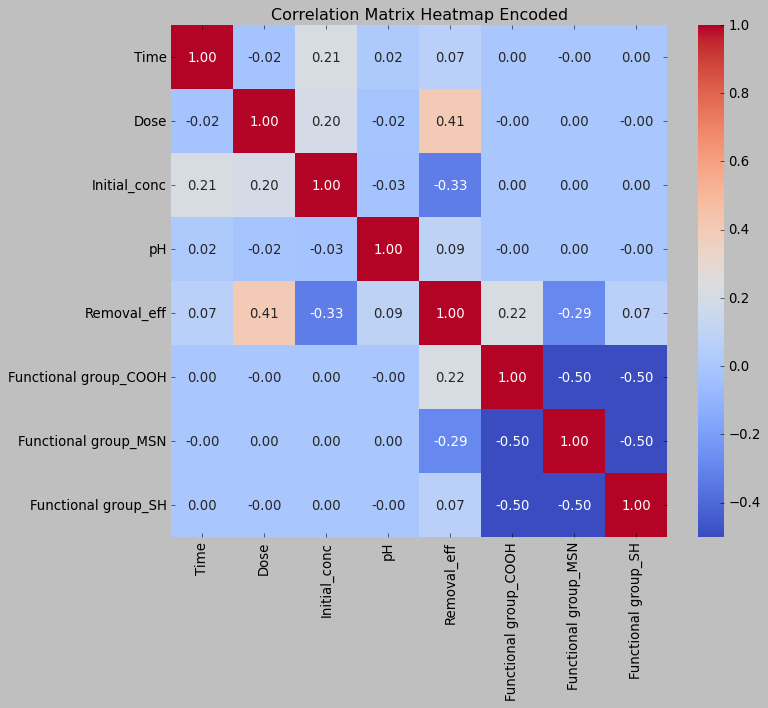

In [389]:
correlation_matrix2 = df_encoded.corr()
# correlation_matrix = df2.corr()

# Display the correlation matrix
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Matrix Heatmap Encoded")
plt.show()

In [ ]:
for label in df_encoded.columns[1:5]:
  plt.scatter(df[label], df['Removal_eff'])
  plt.title(label)
  plt.ylabel('Removal efficiency (%)')
  plt.xlabel(label)
  plt.show()

In [ ]:
df_encoded.describe()

Removal_eff              1.000000
Dose                     0.405633
Functional group_COOH    0.219842
pH                       0.086377
Time                     0.070591
Functional group_SH      0.068437
Functional group_MSN    -0.288279
Initial_conc            -0.329037
Name: Removal_eff, dtype: float64


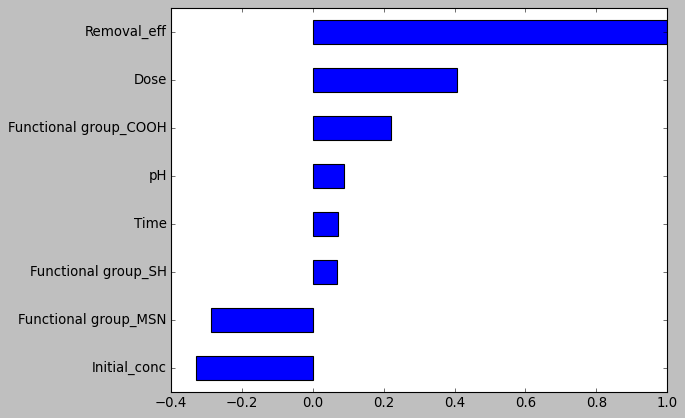

In [391]:
# corr_matrix = data.corr()
corr_matrix = df_encoded.corr()

print(corr_matrix['Removal_eff'].sort_values(ascending=False))
# data.describe()

# Visualise the plot
corr_matrix['Removal_eff'].sort_values().plot.barh()
plt.show()

In [ ]:
#corr matrix of non-categorical features with removal efficiency
corr_matrix3 = data.drop('Functional group', axis=1).corr()

print(corr_matrix3['Removal_eff'].sort_values(ascending=False))

# Visualise the plot
corr_matrix3['Removal_eff'].sort_values().plot.barh()
plt.show()

#### It is observed that when functional group are not considered, all factors except initial dye conc has positive correlation with removal efficiency. Nonetheless, dose and initial conc have the most significant influence.



In [ ]:
corr_matrix['Removal_eff'].sort_values().plot.barh()
plt.show()
#corr_matrix2['Yield'].sort_values().plot.barh()

### When the functional groups are considered separately as a feature, it is observed that COOH has a significant positive effect while bare MSN has a significant negative effect

In [ ]:
#remove temperature
# df2.hist()

In [ ]:
# Heat map of the correlation (No functional group)
sns.heatmap(corr_matrix3, annot=True)

In [ ]:
# Heat map of the correlation (with functional groups treated separately)

#plt.style.use('classic')

sns.heatmap(corr_matrix, annot=True)

In [ ]:
#Plot correlation matrix
from pandas.plotting import scatter_matrix

scatter_matrix(df, figsize=(8,6))
plt.show()

In [ ]:
data.shape

## Data Preparation

In [79]:
#Here, I use OneHot encoded dataFrame because ordinal (or Label encoder) is often bias when the feature has no specific order
#input

input_data = df_encoded.drop('Removal_eff', axis=1)
X = input_data.values
y = df_encoded['Removal_eff'].values

print('Data shape:', X.shape, y.shape)

Data shape: (105, 7) (105,)


In [215]:
#Split the set into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=5)

len(y_test), len(y_train)

(21, 84)

In [216]:
# Scale the data, store it with unique name for later comparison
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_sc = scaler.transform(X_train)

#Apply same to test set
X_test_sc = scaler.transform(X_test)

#All data
X_sc = scaler.transform(X)

In [217]:
## Instantiate the classifiers

#Linear Regression
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=1)

#ANN
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(max_iter=10000, activation='tanh')

#SVR
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=10, gamma=0.01, epsilon=.0001)
svr_lin = SVR(kernel='linear', C=10, gamma='auto')
svr_poly = SVR(kernel='poly', C=10, gamma='auto', degree=3, epsilon=0.0001, coef0=1)

### Learning curves

In [8]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#define a function for plotting learning curves

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state=1)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
    val_errors.append(mean_squared_error(y_val_predict, y_val))
  plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
  plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')
  plt.xlabel("Training Set size")
  plt.ylabel("RMSE")
  plt.legend()


In [ ]:
plot_learning_curves(linreg, X, y)
plt.title('Linear Regression')
plt.show();

plot_learning_curves(rf, X_sc, y)
plt.title('Random Forest')
plt.show();

plot_learning_curves(mlp, X_sc, y)
plt.title('Multi-Layer Perceptron (ANN)')
plt.show();

plot_learning_curves(svr_rbf, X_sc, y)
plt.title('Gaussian SVR')
plt.show();

In [ ]:
plot_learning_curves(linreg, X_train_sc, y_train)
plt.title('Linear Regression')
plt.show()

plot_learning_curves(rf, X_train_sc, y_train)
plt.title('Random Forest')
plt.show()

plot_learning_curves(mlp, X_train_sc, y_train)
plt.title('Multi-Layer Perceptron (ANN)')
plt.show()

plot_learning_curves(svr_rbf, X_train_sc, y_train)
plt.title('Gaussian SVR')
plt.show()

## Linear Regression

### Simple linear

In [218]:
linreg.fit(X_train,y_train)
lreg = LinearRegression()
lreg.fit(X_train_sc,y_train)

print("TEST Accuracy (non-standardized):", linreg.score(X_test,y_test))
print("TEST Accuracy (standardized):", lreg.score(X_test_sc,y_test))
print("TRAIN Accuracy (non-standardized):", linreg.score(X_train,y_train))
print("TRAIN Accuracy (standardized):", lreg.score(X_train_sc,y_train))

TEST Accuracy (non-standardized): 0.4966522426951584
TEST Accuracy (standardized): 0.504281356941519
TRAIN Accuracy (non-standardized): 0.4546610712669462
TRAIN Accuracy (standardized): 0.4529867852439289


In [219]:
#lr = LinearRegression()
#lr.fit(X,y)

linreg.predict(X)

linreg.score(X,y)

0.462834126746974

##### *****From above, Linear Regression cannot be said to be affected by standardization****

## Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
#Prepare the data for polynomial feature transformation

nb_degree = 1  #To ease changing of the values

#Instantiate the import
polynomial_features = PolynomialFeatures(degree = nb_degree)

#Apply the transform to both training and testing data
X_train_transf = polynomial_features.fit_transform(X_train)
X_test_transf = polynomial_features.fit_transform(X_test)

#Instantiate and train the model

model = LinearRegression()
model.fit(X_train_transf, y_train)
y_tr_poly_pred = model.predict(X_train_transf)
#model.score(X_train_transf,y_tr_poly_pred)

y_ts_poly_pred = model.predict(X_test_transf)
print("TEST accuracy (R-sq):", model.score(X_test_transf,y_test).round(4))
print("TRAIN accuracy (R-sq):", model.score(X_train_transf,y_train).round(4))
print("TEST CORR:", np.corrcoef(y_test,y_ts_poly_pred)[0,1].round(4))
print("TRAIN CORR:", np.corrcoef(y_train,y_tr_poly_pred)[0,1].round(4))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test,y_ts_poly_pred)).round(3))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train,y_tr_poly_pred)).round(3))
# model.score(X_test,y_test)

plt.scatter(y_test,y_ts_poly_pred, label='Exp Data')
plt.plot((0,100),(0,100), label='Best fit', color='g', linewidth=4)
plt.xlabel('Expt Performance')
plt.ylabel('Predicted Performance')
plt.title('Polynomial Regression (2nd degree)')
plt.legend(loc='lower right')
plt.show()
#print('MODEL Coefficients:', model.coef_.round(3))
#print('MODEL Intercept:', model.intercept_.round(3))

In [ ]:
# 3rd degree
from sklearn.preprocessing import PolynomialFeatures

#nb_degree = 3  #To ease changing of the values

#Instantiate the import
polynomial_features3 = PolynomialFeatures(degree = 3)

#Apply the transform to both training and testing data
X_train_transf3 = polynomial_features3.fit_transform(X_train)
X_test_transf3 = polynomial_features3.fit_transform(X_test)

#Instantiate and train the model

model3 = LinearRegression()
model3.fit(X_train_transf3, y_train)
y_tr_poly_pred3 = model3.predict(X_train_transf3)
#model.score(X_train_transf,y_tr_poly_pred)

y_ts_poly_pred3 = model3.predict(X_test_transf3)
print("TEST accuracy (R-sq):", model3.score(X_test_transf3,y_test).round(4))
print("TRAIN accuracy (R-sq):", model3.score(X_train_transf3,y_train).round(4))
print("TEST CORR:", np.corrcoef(y_test,y_ts_poly_pred3)[0,1].round(4))
print("TRAIN CORR:", np.corrcoef(y_train,y_tr_poly_pred3)[0,1].round(4))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test,y_ts_poly_pred3)).round(3))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train,y_tr_poly_pred3)).round(3))
# model.score(X_test,y_test)

plt.scatter(y_test,y_ts_poly_pred3, label='Exp Data')
plt.plot((0,100),(0,100), label='Best fit', color='g', linewidth=4)
plt.xlabel('Expt Performance')
plt.ylabel('Predicted Performance')
plt.title('Polynomial Regression (3rd degree)')
plt.legend(loc='lower right')
plt.show()
#print('MODEL Coefficients:', model3.coef_.round(3))
#print('MODEL Intercept:', model.intercept_.round(3))

In [ ]:
#Instantiate the import
polynomial_features1 = PolynomialFeatures(degree = 1)

#Apply the transform to both training and testing data
X_train_transf1 = polynomial_features1.fit_transform(X_train)
X_test_transf1 = polynomial_features1.fit_transform(X_test)

#Instantiate and train the model

model1 = LinearRegression()
model1.fit(X_train_transf1, y_train)
y_tr_poly_pred1 = model1.predict(X_train_transf1)
#model.score(X_train_transf,y_tr_poly_pred)

y_ts_poly_pred1 = model1.predict(X_test_transf1)
print("TEST accuracy (R-sq):", model1.score(X_test_transf1,y_test).round(4))
print("TRAIN accuracy (R-sq):", model1.score(X_train_transf1,y_train).round(4))
print("TEST CORR:", np.corrcoef(y_test,y_ts_poly_pred1)[0,1].round(4))
print("TRAIN CORR:", np.corrcoef(y_train,y_tr_poly_pred1)[0,1].round(4))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test,y_ts_poly_pred1)).round(3))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train,y_tr_poly_pred1)).round(3))
# model.score(X_test,y_test)

plt.scatter(y_test,y_ts_poly_pred1, label='Exp Data')
plt.plot((0,100),(0,100), label='Best fit', color='g', linewidth=4)
plt.xlabel('Expt Performance')
plt.ylabel('Predicted Performance')
plt.title('Polynomial Regression (1st degree)')
plt.legend(loc='lower right')
plt.show()
#print('MODEL Coefficients:', model3.coef_.round(3))
#print('MODEL Intercept:', model.intercept_.round(3))

#### Linear Regression by OLS

In [ ]:
import statsmodels.api as sn

#Define input vs output, then split into training and testing
X1 = input_data
y1 = data['performance']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=1)

len(y1_test)

#Add constant manually as expected when using OLS
X1_train_const = sn.add_constant(X1_train)
X1_test_const = sn.add_constant(X1_test)

#Create/train least square model
lm_model = sn.OLS(y1_train, X1_train_const).fit()

In [ ]:
#To view the model, run
lm_model.summary()

## Random Forest

In [99]:
# Import libraries for cross val and grid search
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate, cross_val_predict

In [220]:
#Define function for the model for ease re-use

def rfr_model(X,y):
    
    #Perform grid search
    gsc = GridSearchCV(estimator=RandomForestRegressor(),
                       param_grid={'max_depth': range(7,21),
                                   'n_estimators': (5, 10, 50, 100, 500, 900, 1000),
                                  }, cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    grid_result = gsc.fit(X,y)
    best_params = grid_result.best_params_
    
    rfr = RandomForestRegressor(max_depth=best_params["max_depth"],
                               n_estimators=best_params["n_estimators"],
                               random_state=False, verbose=False)
    
    # Perform K-Fold CV
    scores = cross_val_score(rfr, X, y, cv=5, scoring='neg_mean_absolute_error')
    predictions = cross_val_predict(rfr, X, y, cv=5)
    
    return scores, best_params, scores.mean(axis=0)

#To get the list of values predicted using the model
#predictions = cross_val_predict(rfr, X, y, cv=10)

In [221]:
# Use the function to optimize the parameters

rfr_model(X_train_sc,y_train)
#scores.sum(axis=1)

(array([ -9.41156248,  -9.34653073, -10.83694712,  -7.87955149,
         -8.21172791]),
 {'max_depth': 18, 'n_estimators': 100},
 -9.137263945306975)

In [ ]:
'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

Random Forest TEST R-sq:  0.9224721432472331
Random Forest TRAIN R-sq:  0.9719024474285929
TEST CORR: 0.9704
TRAIN CORR: 0.989
Test RMSE: 6.7994
Train RMSE: 4.5295


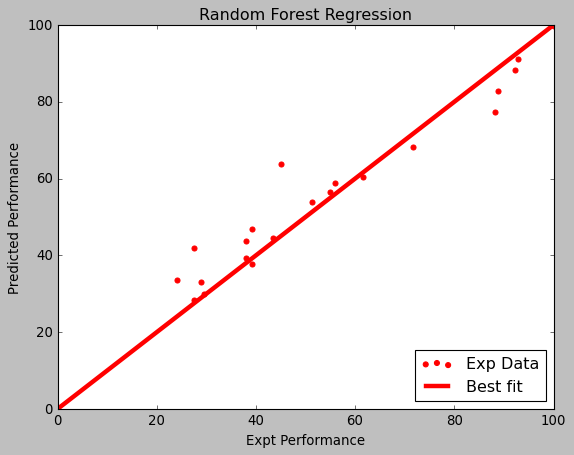

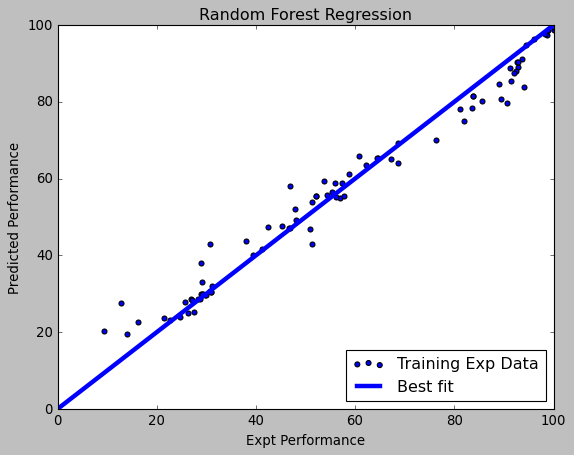

In [387]:
#Apply optimized parameters in the random forest regressor
rfr = RandomForestRegressor(max_depth=18,
                               n_estimators=11800,
                               random_state=7, verbose=False)
rfr.fit(X_train_sc,y_train)

y_ts_rf_pred = rfr.predict(X_test_sc)
y_tr_rf_pred = rfr.predict(X_train_sc)

print('Random Forest TEST R-sq: ', rfr.score(X_test_sc, y_test))
print('Random Forest TRAIN R-sq: ', rfr.score(X_train_sc, y_train))

print("TEST CORR:", np.corrcoef(y_test,y_ts_rf_pred)[0,1].round(4))
print("TRAIN CORR:", np.corrcoef(y_train,y_tr_rf_pred)[0,1].round(4))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test,y_ts_rf_pred)).round(4))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train,y_tr_rf_pred)).round(4))

plt.scatter(y_test,y_ts_rf_pred, label='Exp Data', color='r')
plt.plot((0,100),(0,100), label='Best fit', color='r', linewidth=4)
plt.xlim(0,100)
plt.ylim(0,100)
plt.xlabel('Expt Performance')
plt.ylabel('Predicted Performance')
plt.title('Random Forest Regression')
plt.legend(loc='lower right')
plt.show()
plt.scatter(y_train,y_tr_rf_pred, label='Training Exp Data')
plt.plot((0,100),(0,100), label='Best fit', color='b', linewidth=4)
plt.xlim(0,100)
plt.ylim(0,100)
plt.xlabel('Expt Performance')
plt.ylabel('Predicted Performance')
plt.title('Random Forest Regression')
plt.legend(loc='lower right')
plt.show()

In [ ]:
y_ts_rf_pred

In [ ]:
print(y_ts_svr_pred)
print(y_ts_svrg_pred)
print(y_ts_svrp_pred)
y_test

In [ ]:
rfr.get_params()

### Feature importance

In [261]:
pd.Series(rfr.feature_importances_)

0    0.096618
1    0.305960
2    0.171095
3    0.287793
4    0.044014
5    0.077474
6    0.017047
dtype: float64

In [262]:
# Using random forest's in-built function

ft_imp = pd.Series(rfr.feature_importances_).sort_values(ascending=False)
print(ft_imp)
input_data.columns

1    0.305960
3    0.287793
2    0.171095
0    0.096618
5    0.077474
4    0.044014
6    0.017047
dtype: float64


Index(['Time', 'Dose', 'Initial_conc', 'pH', 'Functional group_COOH',
       'Functional group_MSN', 'Functional group_SH'],
      dtype='object')

[0.10746126 0.58940844 0.27869443 0.56745097 0.07257947 0.18077729
 0.01848293]


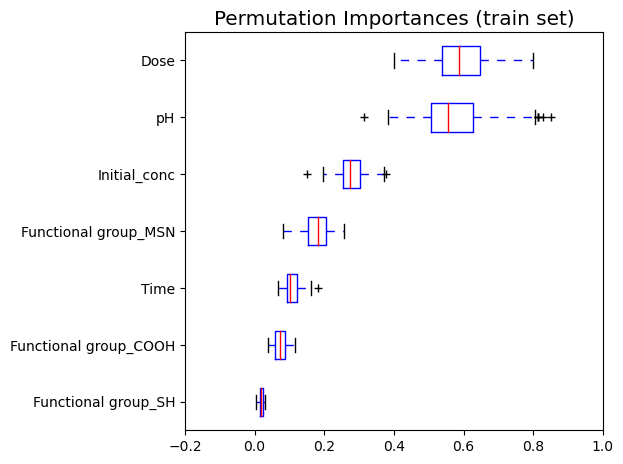

In [263]:
# Using probability-based permutation function

from sklearn.inspection import permutation_importance

result = permutation_importance(rfr, X_train_sc, y_train, n_repeats=100, random_state=0)
print(result.importances_mean)
result.importances_std

sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
plt.style.use('classic')
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=input_data.columns[sorted_idx])
ax.set_title("Permutation Importances (train set)")
fig.tight_layout()
plt.show()

[0.17142792 0.31364374 0.34067562 0.5630263  0.13229983 0.2658272
 0.01635383]


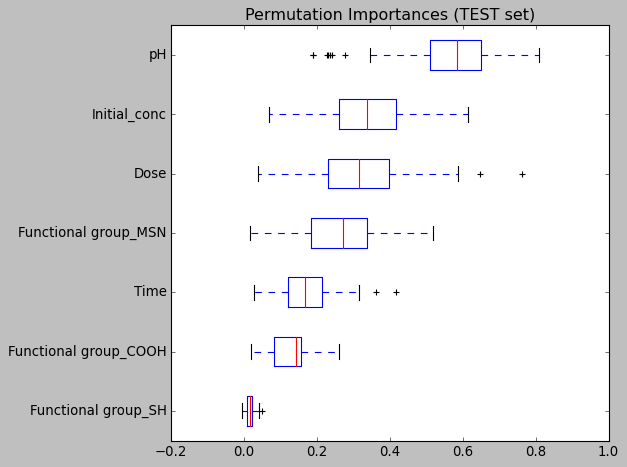

In [264]:

#FOR TEST set

result = permutation_importance(rfr, X_test_sc, y_test, n_repeats=100, random_state=0)
print(result.importances_mean)
result.importances_std

sorted_idx_ts = result.importances_mean.argsort()

fig, ax = plt.subplots()
plt.style.use('classic')
ax.boxplot(result.importances[sorted_idx_ts].T, vert=False, labels=input_data.columns[sorted_idx_ts])
ax.set_title("Permutation Importances (TEST set)")
fig.tight_layout()
plt.show()

[0.11177797 0.54655325 0.30144037 0.5578689  0.0842646  0.19538642
 0.01881734]


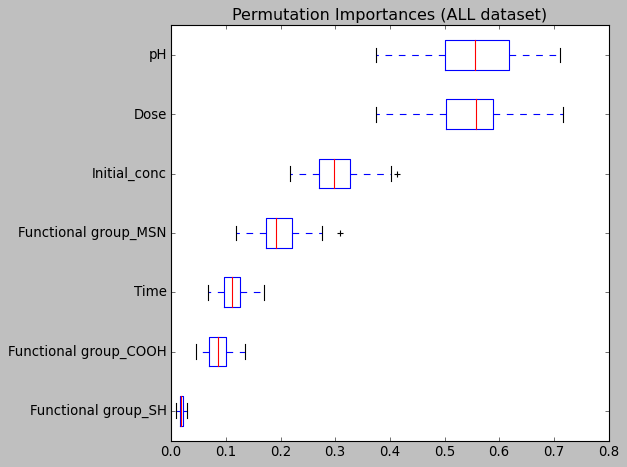

In [265]:
#FOR ALL DATA

result = permutation_importance(rfr, X_sc, y, n_repeats=100, random_state=0)
print(result.importances_mean)
result.importances_std

sorted_idx_all = result.importances_mean.argsort()

fig, ax = plt.subplots()
plt.style.use('classic')
ax.boxplot(result.importances[sorted_idx_all].T, vert=False, labels=input_data.columns[sorted_idx_all])
ax.set_title("Permutation Importances (ALL dataset)")
fig.tight_layout()
plt.show()

## Support Vector Regression

### Linear kernel

In [266]:
# define function
def svr_lin(X, y):
    gsc = GridSearchCV(estimator=SVR(kernel='linear'),
                      param_grid={'C': [0.1, 1, 10, 100, 1000],
                                 'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
                                 }, cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    best_svr = SVR(kernel='linear', C=best_params["C"], epsilon=best_params["epsilon"], coef0=0.1, shrinking=True,
              tol=0.001, cache_size=200, verbose=False, max_iter=-1)

    scoring = {'abs_error': 'neg_mean_absolute_error', 'squared_error': 'neg_mean_squared_error'}
    scores = cross_validate(best_svr, X, y, cv=10, scoring=scoring, return_train_score=True)
    
    return best_params, "MAE :", abs(scores['test_abs_error'].mean()), "| RMSE :", math.sqrt(abs(scores['test_squared_error'].mean()))

# Run
print(svr_lin(X_train_sc, y_train))

({'C': 10, 'epsilon': 10}, 'MAE :', 17.72838418703315, '| RMSE :', 22.829357737141603)


Linear-SVR TEST R-sq:  0.5336767169546417
Linear-SVR TRAIN R-sq:  0.4375438197026401
TEST CORR: 0.7384
TRAIN CORR: 0.6678
Test RMSE: 16.676
Train RMSE: 20.265


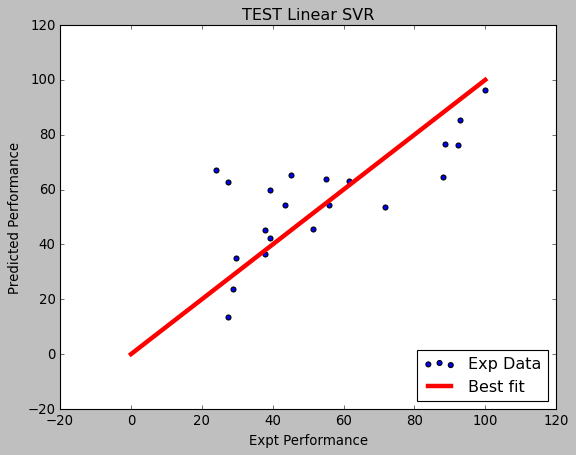

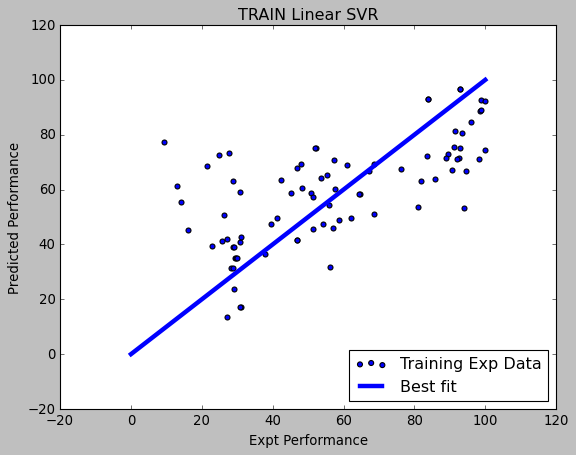

In [268]:
svr_lin = SVR(kernel='linear', C=10, epsilon=10)


svr_lin.fit(X_train_sc,y_train)

y_ts_svr_pred = svr_lin.predict(X_test_sc)
y_tr_svr_pred = svr_lin.predict(X_train_sc)

print('Linear-SVR TEST R-sq: ', svr_lin.score(X_test_sc, y_test))
print('Linear-SVR TRAIN R-sq: ', svr_lin.score(X_train_sc, y_train))

print("TEST CORR:", np.corrcoef(y_test,y_ts_svr_pred)[0,1].round(4))
print("TRAIN CORR:", np.corrcoef(y_train,y_tr_svr_pred)[0,1].round(4))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test,y_ts_svr_pred)).round(3))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train,y_tr_svr_pred)).round(3))

plt.scatter(y_test,y_ts_svr_pred, label='Exp Data')
plt.plot((0,100),(0,100), label='Best fit', color='r', linewidth=4)
plt.xlabel('Expt Performance')
plt.ylabel('Predicted Performance')
plt.title('TEST Linear SVR')
plt.legend(loc='lower right')
plt.show()
plt.scatter(y_train,y_tr_svr_pred, label='Training Exp Data')
plt.plot((0,100),(0,100), label='Best fit', color='b', linewidth=4)
plt.xlabel('Expt Performance')
plt.ylabel('Predicted Performance')
plt.title('TRAIN Linear SVR')
plt.legend(loc='lower right')
plt.show()

### Polynomial SVR

In [269]:
# define function
def svr_poly(X, y):
    gsc = GridSearchCV(estimator=SVR(kernel='poly'),
                      param_grid={'C': [0.1, 1, 10, 100, 1000],
                                 'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
                                  'degree': [2,3,4],
                                  'coef0': [0.1, 0.01, 0.001, 0.0001]},
                       cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    best_svr = SVR(kernel='poly', C=best_params["C"], epsilon=best_params["epsilon"], coef0=best_params["coef0"],
                   degree=best_params["degree"],shrinking=True, tol=0.001, cache_size=200, verbose=False, max_iter=-1)

    scoring = {'abs_error': 'neg_mean_absolute_error', 'squared_error': 'neg_mean_squared_error'}
    scores = cross_validate(best_svr, X, y, cv=10, scoring=scoring, return_train_score=True)
    
    return best_params, "MAE :", abs(scores['test_abs_error'].mean()), "| RMSE :", math.sqrt(abs(scores['test_squared_error'].mean()))

# Run
print(svr_poly(X_train_sc, y_train))

({'C': 100, 'coef0': 0.1, 'degree': 2, 'epsilon': 5}, 'MAE :', 13.91564042181631, '| RMSE :', 19.063274834436395)


Polynomial-SVR TEST R-sq:  0.7536
Polynomial-SVR TRAIN R-sq:  0.7376
TEST CORR: 0.889
TRAIN CORR: 0.8597
Test RMSE: 12.123
Train RMSE: 13.842


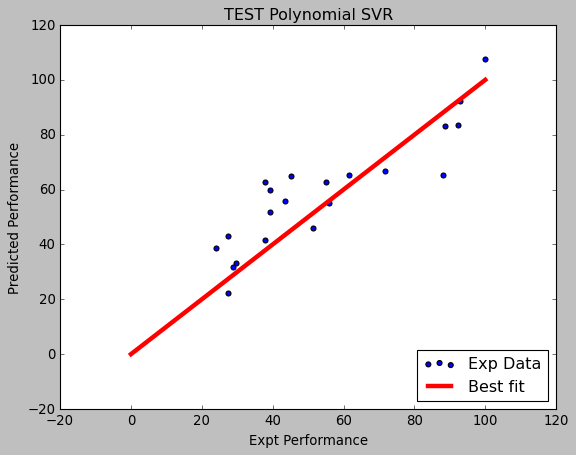

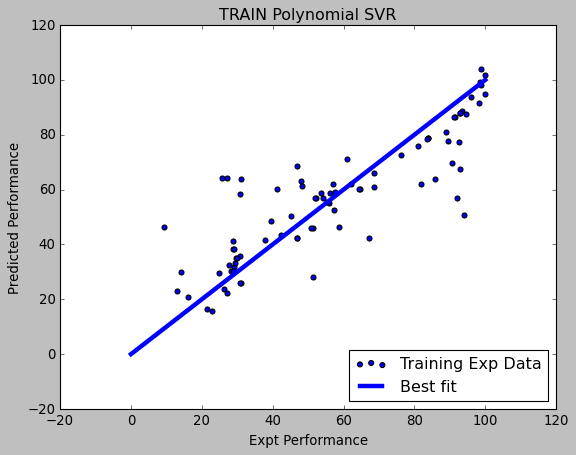

In [270]:
svr_poly = SVR(kernel='poly', degree=2, coef0=0.1, C=100, epsilon=5)


svr_poly.fit(X_train_sc,y_train)

y_ts_svrp_pred = svr_poly.predict(X_test_sc)
y_tr_svrp_pred = svr_poly.predict(X_train_sc)

print('Polynomial-SVR TEST R-sq: ', svr_poly.score(X_test_sc, y_test).round(4))
print('Polynomial-SVR TRAIN R-sq: ', svr_poly.score(X_train_sc, y_train).round(4))

print("TEST CORR:", np.corrcoef(y_test,y_ts_svrp_pred)[0,1].round(4))
print("TRAIN CORR:", np.corrcoef(y_train,y_tr_svrp_pred)[0,1].round(4))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test,y_ts_svrp_pred)).round(3))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train,y_tr_svrp_pred)).round(3))

plt.scatter(y_test,y_ts_svrp_pred, label='Exp Data')
plt.plot((0,100),(0,100), label='Best fit', color='r', linewidth=4)
plt.xlabel('Expt Performance')
plt.ylabel('Predicted Performance')
plt.title('TEST Polynomial SVR')
plt.legend(loc='lower right')
plt.show()
plt.scatter(y_train,y_tr_svrp_pred, label='Training Exp Data')
plt.plot((0,100),(0,100), label='Best fit', color='b', linewidth=4)
plt.xlabel('Expt Performance')
plt.ylabel('Predicted Performance')
plt.title('TRAIN Polynomial SVR')
plt.legend(loc='lower right')
plt.show()

### Gausian (RBF kernel) SVR

In [271]:
# define function
def svr_rbf(X, y):
    gsc = GridSearchCV(estimator=SVR(kernel='rbf'),
                      param_grid={'C': [0.1, 1, 10, 100, 1000],
                                 'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
                                  #'degree': [2,3,4],
                                  'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]},
                       cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    best_svr = SVR(kernel='rbf', C=best_params["C"], epsilon=best_params["epsilon"], gamma=best_params["gamma"],coef0=0.1,
                   shrinking=True, tol=0.001, cache_size=200, verbose=False, max_iter=-1)

    scoring = {'abs_error': 'neg_mean_absolute_error', 'squared_error': 'neg_mean_squared_error'}
    scores = cross_validate(best_svr, X, y, cv=10, scoring=scoring, return_train_score=True)
    
    return best_params, "MAE :", abs(scores['test_abs_error'].mean()), "| RMSE :", math.sqrt(abs(scores['test_squared_error'].mean()))

# Run
print(svr_rbf(X_train_sc, y_train))

({'C': 100, 'epsilon': 1, 'gamma': 0.1}, 'MAE :', 11.158886207059803, '| RMSE :', 16.308709284215)


Gaussian-SVR TEST R-sq:  0.5121
Gaussian-SVR TRAIN R-sq:  0.3768
TEST CORR: 0.7594
TRAIN CORR: 0.6473
Test RMSE: 17.058
Train RMSE: 21.332


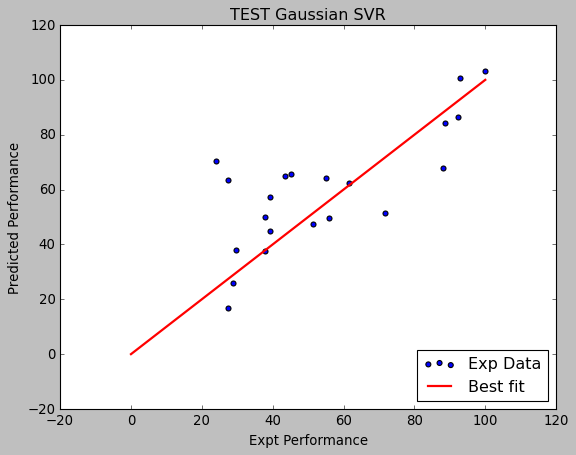

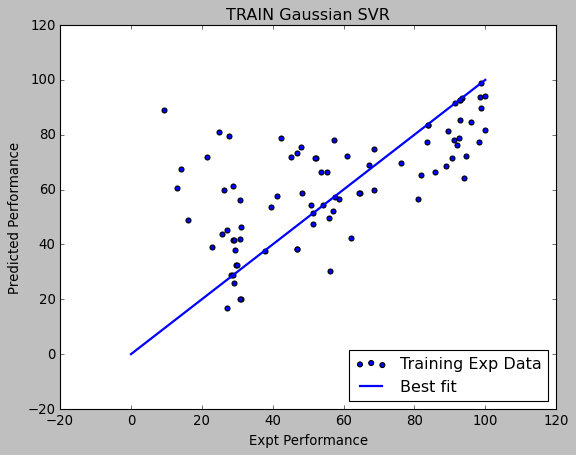

In [332]:
svr_rbf = SVR(kernel='rbf', coef0=0.3, C=500000, epsilon=0.003, gamma=0.00003)


svr_rbf.fit(X_train_sc,y_train)

y_ts_svrg_pred = svr_rbf.predict(X_test_sc)
y_tr_svrg_pred = svr_rbf.predict(X_train_sc)

print('Gaussian-SVR TEST R-sq: ', svr_rbf.score(X_test_sc, y_test).round(4))
print('Gaussian-SVR TRAIN R-sq: ', svr_rbf.score(X_train_sc, y_train).round(4))

print("TEST CORR:", np.corrcoef(y_test,y_ts_svrg_pred)[0,1].round(4))
print("TRAIN CORR:", np.corrcoef(y_train,y_tr_svrg_pred)[0,1].round(4))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test,y_ts_svrg_pred)).round(3))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train,y_tr_svrg_pred)).round(3))

plt.scatter(y_test,y_ts_svrg_pred, label='Exp Data')
plt.plot((0,100),(0,100), label='Best fit', color='r', linewidth=2)
plt.xlabel('Expt Performance')
plt.ylabel('Predicted Performance')
plt.title('TEST Gaussian SVR')
plt.legend(loc='lower right')
plt.show()
plt.scatter(y_train,y_tr_svrg_pred, label='Training Exp Data')
plt.plot((0,100),(0,100), label='Best fit', color='b', linewidth=2)
plt.xlabel('Expt Performance')
plt.ylabel('Predicted Performance')
plt.title('TRAIN Gaussian SVR')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#svr_rbf.get_params()
#svr_poly.get_params()
#svr_lin.get_params()

## Multilayer Perceptron (Neural Network)

In [ ]:
# Number of hidden layer was tested from 2 to 20, the best was found to be 14

Multilayer Percenptron TEST R-sq:  0.8891
Multilayer Percenptron TRAIN R-sq:  0.965
TEST CORR: 0.9436
TRAIN CORR: 0.983
Test RMSE: 8.134
Train RMSE: 5.052


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


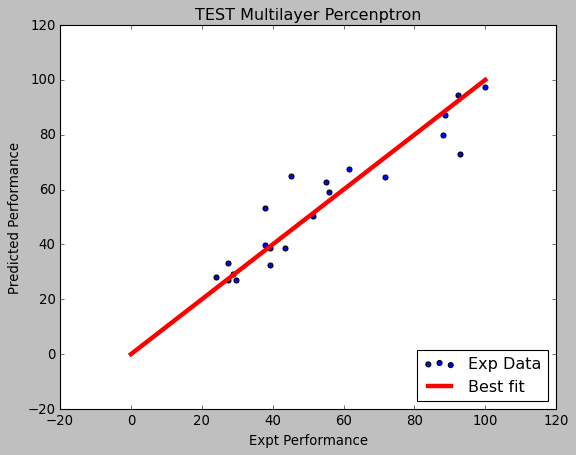

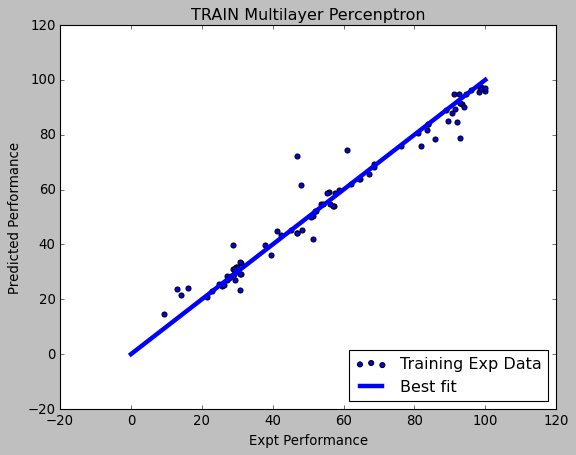

In [364]:
mlp = MLPRegressor(hidden_layer_sizes=(15,), activation='tanh', max_iter=10000, verbose=0, random_state=5) #, n_jobs=-1)

mlp.fit(X_train_sc,y_train)

y_ts_mlp_pred = mlp.predict(X_test_sc)
y_tr_mlp_pred = mlp.predict(X_train_sc)

print('Multilayer Percenptron TEST R-sq: ', mlp.score(X_test_sc, y_test).round(4))
print('Multilayer Percenptron TRAIN R-sq: ', mlp.score(X_train_sc, y_train).round(4))

print("TEST CORR:", np.corrcoef(y_test,y_ts_mlp_pred)[0,1].round(4))
print("TRAIN CORR:", np.corrcoef(y_train,y_tr_mlp_pred)[0,1].round(4))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test,y_ts_mlp_pred)).round(3))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train,y_tr_mlp_pred)).round(3))

plt.scatter(y_test,y_ts_mlp_pred, label='Exp Data')
plt.plot((0,100),(0,100), label='Best fit', color='r', linewidth=4)
plt.xlabel('Expt Performance')
plt.ylabel('Predicted Performance')
plt.title('TEST Multilayer Percenptron')
plt.legend(loc='lower right')
plt.show()
plt.scatter(y_train,y_tr_mlp_pred, label='Training Exp Data')
plt.plot((0,100),(0,100), label='Best fit', color='b', linewidth=4)
plt.xlabel('Expt Performance')
plt.ylabel('Predicted Performance')
plt.title('TRAIN Multilayer Percenptron')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#mlp_model(X_train_sc,y_train)
mlp.get_params()

## Effect of parameters

In [ ]:
effects = pd.read_csv('effects_of_factors.csv')
effects.head()

In [ ]:
test_effects = effects.drop('performance', axis=1)
print(test_effects.head(2))

test_effects_sc = scaler.transform(test_effects)


In [ ]:
#test_effects_val = test_effects.values
#test_effects_val
#test_effects_val_sc = scaler.transform(test_effects_val)

In [ ]:
#mlp_effects_val = mlp.predict(test_effects_val_sc)

#y_mlp_effects_val = mlp_effects_val.tolist()
#y_mlp_effects_val

#convert list to dataframe
#y_mlp_effects_val_df = pd.DataFrame(y_mlp_effects_val, columns=['ANN_effects_val'])
#y_mlp_effects_val_df
#y_mlp_effects_val_df.to_csv(r'C:\Users\Admin\Desktop\Saheed_Al_AC\results\mlp_effects_val_output2.csv', index = False)

In [ ]:
lreg.predict()
model.predict()

rfr.predict()

svr_lin.predict()
svr_poly.predict()
svr_rbf.predict()

mlp.predict()

In [ ]:
#Lin reg

lreg_effects = lreg.predict(test_effects)

y_lreg_effects = lreg_effects.tolist()
#y_lreg_effects

#convert list to dataframe
y_lreg_effects_df = pd.DataFrame(y_lreg_effects, columns=['LINREG_effects'])

y_lreg_effects_df
y_lreg_effects_df.to_csv(r'C:\Users\Admin\Desktop\Saheed_Al_AC\eff_results\LinReg_effects_output.csv', index = False)



In [ ]:
linreg_all = linreg.predict(X)
y_linreg_all = linreg_all.tolist()

#convert list to dataframe
y_linreg_all_df = pd.DataFrame(y_linreg_all, columns=['linreg_all'])

y_linreg_all_df.head()


In [ ]:
#POLY reg

nb_degree = 2  #To ease changing of the values

#Instantiate the import
polynomial_features = PolynomialFeatures(degree = nb_degree)

#Apply the transform to both training and testing data
test_effects_transf = polynomial_features.fit_transform(test_effects)


polyreg_effects = model.predict(test_effects_transf)

polyreg_effects = polyreg_effects.tolist()
#polyreg_effects

#convert list to dataframe
polyreg_effects_df = pd.DataFrame(polyreg_effects, columns=['POLYReg2_effects'])
polyreg_effects_df
polyreg_effects_df.to_csv(r'C:\Users\Admin\Desktop\Saheed_Al_AC\eff_results\polyreg_effects_output.csv', index = False)


In [ ]:
nb_degree = 3  #To ease changing of the values

#Instantiate the import
polynomial_features = PolynomialFeatures(degree = nb_degree)

#Apply the transform to all data
X_transf = polynomial_features.fit_transform(X)


polyreg_X = model.predict(X_transf)

polyreg_all = polyreg_X.tolist()
#polyreg_effects

#convert list to dataframe
poly2reg_all_df = pd.DataFrame(polyreg_all, columns=['PolyReg2_all'])

poly2reg_all_df.head()




#y_lreg_all_df
#poly2reg_all_df

In [ ]:
#POLY reg

nb_degree = 3  #To ease changing of the values

#Instantiate the import
polynomial_features3 = PolynomialFeatures(degree = nb_degree)

#Apply the transform to both training and testing data
test_effects_transf = polynomial_features3.fit_transform(test_effects)


polyreg_effectsf = model3.predict(test_effects_transf)

polyreg_effectsf = polyreg_effectsf.tolist()
#polyreg_effects

#convert list to dataframe
polyreg_effectsf_df = pd.DataFrame(polyreg_effectsf, columns=['Poly3_effects'])
polyreg_effectsf_df
polyreg_effectsf_df.to_csv(r'C:\Users\Admin\Desktop\Saheed_Al_AC\eff_results\polyreg3-deg_effects_output.csv', index = False)


In [ ]:
nb_degree = 3  #To ease changing of the values

#Instantiate the import
polynomial_features3 = PolynomialFeatures(degree = nb_degree)

#Apply the transform to both training and testing data
all_transf = polynomial_features3.fit_transform(X)


poly3reg = model3.predict(all_transf)

poly3reg = poly3reg.tolist()
#polyreg_effects

#convert list to dataframe
poly3reg_all_df = pd.DataFrame(poly3reg, columns=['PolyReg3_all'])

poly3reg_all_df.head()




#y_lreg_all_df
#poly2reg_all_df
#poly3reg_all_df

In [ ]:
#RForest
rf_effects = rfr.predict(test_effects_sc)

rf_effects = rf_effects.tolist()
#polyreg_effects

#convert list to dataframe
rf_effects_df = pd.DataFrame(rf_effects, columns=['RForest_effects'])
rf_effects_df
rf_effects_df.to_csv(r'C:\Users\Admin\Desktop\Saheed_Al_AC\eff_results\Rforest_effects_output.csv', index = False)

#PolySVR
polysvr_effects = svr_poly.predict(test_effects_sc)

polysvr_effects = polysvr_effects.tolist()
#polyreg_effects

#convert list to dataframe
polysvr_effects_df = pd.DataFrame(polysvr_effects, columns=['polySVR_effects'])
polysvr_effects_df
polysvr_effects_df.to_csv(r'C:\Users\Admin\Desktop\Saheed_Al_AC\eff_results\polysvr_effects_output.csv', index = False)

In [368]:
#RF
rf_all = rfr.predict(X_sc)
rf_all = rf_all.tolist()

#convert list to dataframe
rf_all_df = pd.DataFrame(rf_all, columns=['RForest_ALL'])
rf_all_df.head()

# Convert to csv
rf_all_df.to_csv(r'C:\Users\Admin\Documents\UoB\Manuscripts\PhD in-progress-papers\MSN\ML\results\rf_CV_all-data_output.csv', index = False)


In [ ]:
#LinSVR
linsvr_all =svr_lin.predict(X_sc)
linsvr_all = linsvr_all.tolist()

linsvr_all_df = pd.DataFrame(linsvr_all, columns=['linSVR_ALL'])
linsvr_all_df.head()


In [ ]:
#PolySVR
polysvr_all =svr_poly.predict(X_sc)
polysvr_all = polysvr_all.tolist()

polysvr_all_df = pd.DataFrame(polysvr_all, columns=['polySVR_ALL'])
polysvr_all_df.head()


#y_lreg_all_df
#poly2reg_all_df
#poly3reg_all_df
#rf_all_df
#polysvr_all_df

In [ ]:
#rbfSVR
rbfsvr_effects = svr_rbf.predict(test_effects_sc)

rbfsvr_effects = rbfsvr_effects.tolist()
#polyreg_effects

#convert list to dataframe
rbfsvr_effects_df = pd.DataFrame(rbfsvr_effects, columns=['rbfSVR_effects'])
rbfsvr_effects_df
rbfsvr_effects_df.to_csv(r'C:\Users\Admin\Desktop\Saheed_Al_AC\eff_results\RBFsvr_effects_output.csv', index = False)

In [ ]:
#rbfSVR
rbfsvr_all =svr_rbf.predict(X_sc)
rbfsvr_all = rbfsvr_all.tolist()

rbfsvr_all_df = pd.DataFrame(rbfsvr_all, columns=['rbfSVR_ALL'])
rbfsvr_all_df.head()


#y_lreg_all_df
#poly2reg_all_df
#poly3reg_all_df
#rf_all_df
#polysvr_all_df
#rbfsvr_all_df

In [ ]:
#ANN

mlp_effects = mlp.predict(test_effects_sc)

y_mlp_effects = mlp_effects.tolist()
y_mlp_effects

#convert list to dataframe
y_mlp_effects_df = pd.DataFrame(y_mlp_effects, columns=['ANN_effects'])
y_mlp_effects_df
y_mlp_effects_df.to_csv(r'C:\Users\Admin\Desktop\Saheed_Al_AC\eff_results\mlp_effects_output.csv', index = False)

In [ ]:
#ANN
mlp_all =mlp.predict(X_sc)
mlp_all = mlp_all.tolist()

mlp_all_df = pd.DataFrame(mlp_all, columns=['mlp_ALL'])
mlp_all_df.head()


#y_lreg_all_df
#poly2reg_all_df
#poly3reg_all_df
#rf_all_df
#polysvr_all_df
#rbfsvr_all_df
#mlp_all_df

In [ ]:
y_mlp_effects.to_csv(r'C:\Users\Admin\Desktop\Saheed_Al_AC\results\mlp_effects_output.csv', index = False)

In [ ]:
#TRAIN_TEST OUTPUT
mlp_train = mlp.predict(X_train_sc)
mlp_test = mlp.predict(X_test_sc)

y_mlp_train = mlp_train.tolist()
y_mlp_test = mlp_test.tolist()

#convert list to dataframe
y_mlp_train_df = pd.DataFrame(y_mlp_train, columns=['ANN_train'])
y_mlp_test_df = pd.DataFrame(y_mlp_test, columns=['ANN_test'])

y_mlp_train_df.to_csv(r'C:\Users\Admin\Desktop\Saheed_Al_AC\train_test_outputs\mlp_train_output.csv', index = False)
y_mlp_test_df.to_csv(r'C:\Users\Admin\Desktop\Saheed_Al_AC\train_test_outputs\mlp_test_output.csv', index = False)

In [366]:
#TRAIN_TEST OUTPUT
rfr_train = rfr.predict(X_train_sc)
rfr_test = rfr.predict(X_test_sc)

y_rfr_train = rfr_train.tolist()
y_rfr_test = rfr_test.tolist()

#convert list to dataframe
y_rfr_train_df = pd.DataFrame(y_rfr_train, columns=['RF_train'])
y_rfr_test_df = pd.DataFrame(y_rfr_test, columns=['RF_test'])

y_rfr_train_df.to_csv(r'C:\Users\Admin\Documents\UoB\Manuscripts\PhD in-progress-papers\MSN\ML\results\rfr_CV_train_output.csv', index = False)
y_rfr_test_df.to_csv(r'C:\Users\Admin\Documents\UoB\Manuscripts\PhD in-progress-papers\MSN\ML\results\rfr_CV_test_output.csv', index = False)


In [ ]:
#TRAIN_TEST OUTPUT

#PolySVR
polysvr_train = svr_poly.predict(X_train_sc)
polysvr_test = svr_poly.predict(X_test_sc)

y_polysvr_train = polysvr_train.tolist()
y_polysvr_test = polysvr_test.tolist()

#convert list to dataframe
y_polysvr_train_df = pd.DataFrame(y_polysvr_train, columns=['polySVR_train'])
y_polysvr_test_df = pd.DataFrame(y_polysvr_test, columns=['polySVR_test'])

y_polysvr_train_df.to_csv(r'C:\Users\Admin\Desktop\Saheed_Al_AC\train_test_outputs\polysvr_train_output.csv', index = False)
y_polysvr_test_df.to_csv(r'C:\Users\Admin\Desktop\Saheed_Al_AC\train_test_outputs\polysvr_test_output.csv', index = False)


#rbfSVR
rbfsvr_train = svr_rbf.predict(X_train_sc)
rbfsvr_test = svr_rbf.predict(X_test_sc)

y_rbfsvr_train = rbfsvr_train.tolist()
y_rbfsvr_test = rbfsvr_test.tolist()

#convert list to dataframe
y_rbfsvr_train_df = pd.DataFrame(y_rbfsvr_train, columns=['rbfSVR_train'])
y_rbfsvr_test_df = pd.DataFrame(y_rbfsvr_test, columns=['rbfSVR_test'])

y_rbfsvr_train_df.to_csv(r'C:\Users\Admin\Desktop\Saheed_Al_AC\train_test_outputs\rbfsvr_train_output.csv', index = False)
y_rbfsvr_test_df.to_csv(r'C:\Users\Admin\Desktop\Saheed_Al_AC\train_test_outputs\rbfsvr_test_output.csv', index = False)


#LinSVR
linsvr_train = svr_lin.predict(X_train_sc)
linsvr_test = svr_lin.predict(X_test_sc)

y_linsvr_train = linsvr_train.tolist()
y_linsvr_test = linsvr_test.tolist()

#convert list to dataframe
y_linsvr_train_df = pd.DataFrame(y_linsvr_train, columns=['linSVR_train'])
y_linsvr_test_df = pd.DataFrame(y_linsvr_test, columns=['linSVR_test'])

y_linsvr_train_df.to_csv(r'C:\Users\Admin\Desktop\Saheed_Al_AC\train_test_outputs\linsvr_train_output.csv', index = False)
y_linsvr_test_df.to_csv(r'C:\Users\Admin\Desktop\Saheed_Al_AC\train_test_outputs\linsvr_test_output.csv', index = False)

In [ ]:
#TRAIN_TEST_OUTPUT Linear and poly regression


y_polyreg1_train = y_tr_poly_pred1.tolist()
y_polyreg1_test = y_ts_poly_pred1.tolist()

#convert list to dataframe
y_polyreg1_train_df = pd.DataFrame(y_polyreg1_train, columns=['LinReg_train'])
y_polyreg1_test_df = pd.DataFrame(y_polyreg1_test, columns=['LinReg_test'])

y_polyreg1_train_df.to_csv(r'C:\Users\Admin\Desktop\Saheed_Al_AC\train_test_outputs\linReg_train_output.csv', index = False)
y_polyreg1_test_df.to_csv(r'C:\Users\Admin\Desktop\Saheed_Al_AC\train_test_outputs\linReg_test_output.csv', index = False)


#Deg2poly
y_polyreg_train = y_tr_poly_pred.tolist()
y_polyreg_test = y_ts_poly_pred.tolist()

#convert list to dataframe
y_polyreg_train_df = pd.DataFrame(y_polyreg_train, columns=['Poly2Reg_train'])
y_polyreg_test_df = pd.DataFrame(y_polyreg_test, columns=['Poly2Reg_test'])

y_polyreg_train_df.to_csv(r'C:\Users\Admin\Desktop\Saheed_Al_AC\train_test_outputs\Poly2Reg_train_output.csv', index = False)
y_polyreg_test_df.to_csv(r'C:\Users\Admin\Desktop\Saheed_Al_AC\train_test_outputs\Poly2Reg_test_output.csv', index = False)



#Deg3poly
y_polyreg3_train = y_tr_poly_pred3.tolist()
y_polyreg3_test = y_ts_poly_pred3.tolist()

#convert list to dataframe
y_polyreg3_train_df = pd.DataFrame(y_polyreg3_train, columns=['Poly3Reg_train'])
y_polyreg3_test_df = pd.DataFrame(y_polyreg3_test, columns=['Poly3Reg_test'])

y_polyreg3_train_df.to_csv(r'C:\Users\Admin\Desktop\Saheed_Al_AC\train_test_outputs\Poly3Reg_train_output.csv', index = False)
y_polyreg3_test_df.to_csv(r'C:\Users\Admin\Desktop\Saheed_Al_AC\train_test_outputs\Poly3Reg_test_output.csv', index = False)

In [367]:
#Deg3poly
y_tr = y_train.tolist()
y_ts = y_test.tolist()

#convert list to dataframe
y_train_df = pd.DataFrame(y_tr, columns=['y_train'])
y_test_df = pd.DataFrame(y_ts, columns=['y_test'])

y_train_df.to_csv(r'C:\Users\Admin\Documents\UoB\Manuscripts\PhD in-progress-papers\MSN\ML\results\exp_train_output.csv', index = False)
y_test_df.to_csv(r'C:\Users\Admin\Documents\UoB\Manuscripts\PhD in-progress-papers\MSN\ML\results\exp_test_output.csv', index = False)

In [ ]:
# Create some Pandas dataframes from some data.
 #    y_train_df = pd.DataFrame(y_tr, columns=['y_train'])
 #    y_test_df = pd.DataFrame(y_ts, columns=['y_test'])

# Create a Pandas Excel writer using XlsxWriter as the engine.
train_test_writer = pd.ExcelWriter('all_train_test_output.xlsx', engine='xlsxwriter')


# Write each dataframe to a different worksheet.
y_train_df.to_excel(train_test_writer, sheet_name='traindata') 
y_test_df.to_excel(train_test_writer, sheet_name='testdata')  

y_polyreg_train_df.to_excel(train_test_writer, sheet_name='2degpolytrain') 
y_polyreg_test_df.to_excel(train_test_writer, sheet_name='2degpolytest') 

y_polysvr_train_df.to_excel(train_test_writer, sheet_name='polySVRtrain') 
y_polysvr_test_df.to_excel(train_test_writer, sheet_name='polySVRtest') 

y_rfr_train_df.to_excel(train_test_writer, sheet_name='RFtrain') 
y_rfr_test_df.to_excel(train_test_writer, sheet_name='RFtest') 

y_mlp_train_df.to_excel(train_test_writer, sheet_name='ANNtrain') 
y_mlp_test_df.to_excel(train_test_writer, sheet_name='ANNtest') 


# Close the Pandas Excel writer and output the Excel file.
train_test_writer.save()


In [ ]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
all_output_writer = pd.ExcelWriter('all_output.xlsx', engine='xlsxwriter')


# Write each dataframe to a different worksheet.
y_linreg_all_df.to_excel(all_output_writer, sheet_name='LinReg')
poly2reg_all_df.to_excel(all_output_writer, sheet_name='poly2reg')
poly3reg_all_df.to_excel(all_output_writer, sheet_name='poly3reg') 
rf_all_df.to_excel(all_output_writer, sheet_name='RF') 
linsvr_all_df.to_excel(all_output_writer, sheet_name='linSVR')
polysvr_all_df.to_excel(all_output_writer, sheet_name='polySVR')
rbfsvr_all_df.to_excel(all_output_writer, sheet_name='rbfSVR')
mlp_all_df.to_excel(all_output_writer, sheet_name='ANN')


# Close the Pandas Excel writer and output the Excel file.
all_output_writer.save()


#y_lreg_all_df
#poly2reg_all_df
#poly3reg_all_df
#rf_all_df
#polysvr_all_df
#rbfsvr_all_df
#mlp_all_df

In [ ]:
# To EXPLAIN any of the models, use this;

pip install lib

lib.explain(model)